In [2]:
# runs the util notebook so that those functions are available
%run utils.ipynb

In [3]:
X, y, features = load_standardized_beans()
X_train, X_valid, X_test, y_train, y_valid, y_test =  split(X,y)

In [4]:
# Baseline RandomForests Classifier
#using n_estimators as 100
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_valid)
print('accuracy: ', np.mean(y_valid == y_pred))

accuracy:  0.9291222915901579


By Default, the Random Forests Classifier already uses "ovr", so a second version is not presented.

In [5]:
test_classifier(classifier, X, y)

Classifier type: RandomForestClassifier
Classifier paramaters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classifier accuracy:  0.9252812531452349


As was done with the SVM, we will also be showing the difference when using the non standardized version, with the Random Forests Classifier

In [6]:
# Trying SVM classification with the non-standardized data

X, y, features = load_beans()

classifier = RandomForestClassifier(n_estimators=100)
test_classifier(classifier, X, y)

Classifier type: RandomForestClassifier
Classifier paramaters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classifier accuracy:  0.9246200826065172


In this case, the standardized data has a slightly higher accuracy, if we are looking at 3 significant figures or more. Just as was done with the SVM, we will be sticking with standardized Data for the time being.

In [7]:
X, y, features = load_standardized_beans()

The Baseline accuracy at the moment is **92.3%** using the Random Forests Classifier. At this point, the hyperparameters will be tuned, in order to find the best model for our data.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 30, 'n_estimators': 200}
Best Accuracy: 0.9190301249081557


As you can see above, the best value for the maximum depth was 20, with an n_estimator value of 200. I would like to note that it was not feasible to do more than three values in the parameter grid, nor to add additional parameters such as the minimum samples split value, or the minumum samples leaf value, as doing so would increase the computation time to over an hour.

The code below will help us determine what are considered the most impactful features from the dataset

In [9]:
import pandas as pd


classifier.fit(X_train, y_train)
importances = classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

print(importance_df)

            Feature  Importance
0              Area    0.055617
1         Perimeter    0.090531
2   MajorAxisLength    0.075285
3   MinorAxisLength    0.071291
4      AspectRation    0.055246
5      Eccentricity    0.070908
6        ConvexArea    0.079432
7     EquivDiameter    0.065631
8            Extent    0.011836
9          Solidity    0.017624
10        roundness    0.054633
11      Compactness    0.085400
12     ShapeFactor1    0.090563
13     ShapeFactor2    0.044329
14     ShapeFactor3    0.103092
15     ShapeFactor4    0.028581


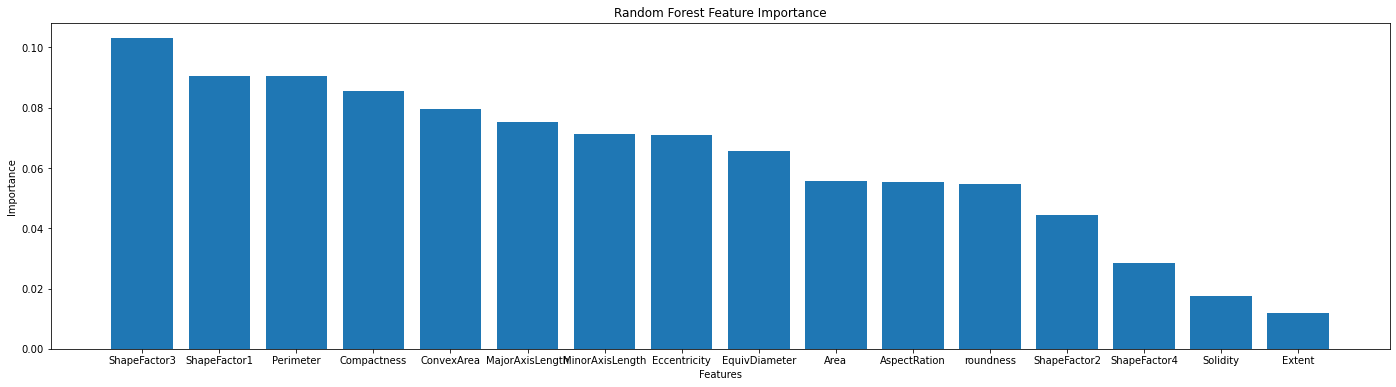

In [10]:
import matplotlib.pyplot as plt

importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(24, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

As can be seen in the graph above, the feature with the highest importance is identified to be the Perimiter, while the Extent and Solidity Features of the drybeans dataset, have been slated as the least impactful. The next segment of code will show how the accuracy may change when the two lowest impact features are removed.

In [11]:
import numpy as np

X = np.delete(X, 8, axis = 1)
X = np.delete(X, 8, axis = 1)
features.pop(8)
features.pop(8)

'Solidity'

In [12]:
classifier = RandomForestClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_valid)
print('accuracy: ', np.mean(y_valid == y_pred))

accuracy:  0.9254498714652957


Based on the accuracies gathered, of the standardized version, vs the version with the removal of the two features that were considered the least important, there is actually a decrease in the accuracy by roughly 1 percent. As such, its obvious that while the importance of those two features were not as high as the others, they do affect the overall acucracy, albeit slightly.

Below is the code for Selecting the best hyperparameters.

In [16]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [19]:
grid_search.best_score_

0.9190301249081557

The code below will be used to highlight the accuracy of Random Forests classifier, using the best hyperparameters

In [20]:
classifier = RandomForestClassifier(n_estimators=200, max_depth=30)
test_classifier(classifier, X_train, y_train)

Classifier type: RandomForestClassifier
Classifier paramaters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Classifier accuracy:  0.9172667156502572
